# Part II - Ford GoBike Riding Data Presentation
## by Fidelis Mukudi

## Investigation Overview

In this presentation, we will provide the key findings relating to the riding durations of the Ford GoBike. they focus on the riders riding duration, their age, gender, and the start station points.

We found that 

* The highest percentage of bike riders are between 25 and 35 years old. 
* Three quarters of the rider are males while the female are almost a quarter while the other gender is 2%.
* The majority of the riders ride for less than 5000 seconds and are aged between 25 and 35 years. The majority of Riders riding for longer hours are within the same age bracket. A few elders beyond 70 years ride for more than 10000 seconds.
* On average the male ride for a shorter period than the female and the other gender.
* In general, start stations having the highest number of riders do not have highest average riding durations. 


## Dataset Overview

The project was about creating visualization for Ford GoBike System Data . The data contains details rides of different people of different age and sex from different start stations. It has 183412 rows and 16 columns. The variable of interest is the duration of riding. We have provided the findings on how the duration of riding varies with different variables such as age, sex and start_station_id.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_data=pd.read_csv('fordgobike-tripdata.csv')

In [3]:
#drop null values
bike_data.dropna(inplace=True)
bike_data.isna().any().sum()

0

In [4]:
#Change data types and drop zeros at the end of elements in and member_birth_year,start_station_id,end_station_id.
bike_data=bike_data.astype({'start_station_id':'int','end_station_id':'int','member_birth_year':'int'})

In [5]:
start_years=bike_data['start_time'].apply(lambda x: x.split('-')[0]).astype(int)
bike_data['age']=start_years-bike_data['member_birth_year']

## Distribution of age among the riders

The highest percentage of bike riders are between 25 and 35 years old. 

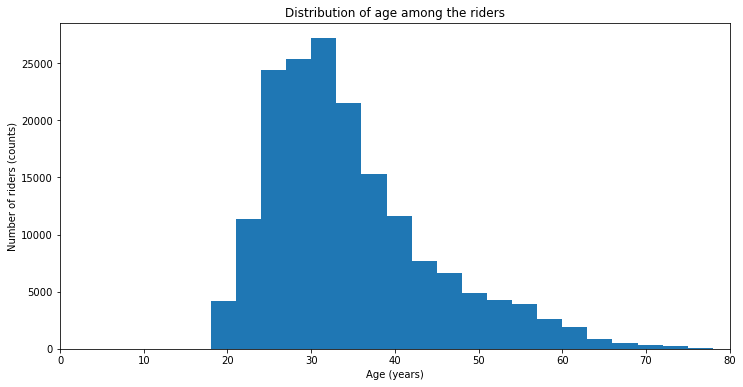

In [24]:
fig1=plt.figure(figsize=(12,6))
bins_age=np.arange(18,90+3,3)
plt.hist(data=bike_data, x='age',bins=bins_age)
plt.xlabel('Age (years)')
plt.xlim((0,80))
plt.ylabel('Number of riders (counts)')
plt.title('Distribution of age among the riders');

## Distribution of gender among the riders
Three quarters of the rider are males. The Female are almost a quarter while the other gender is 2%.

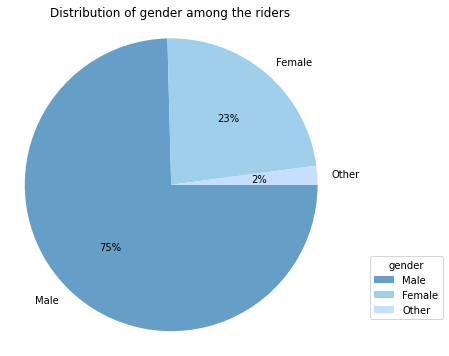

In [21]:
fig=plt.figure(figsize=(12,6))  
colors2=['#659EC7','#A0CFEC','#C6DEFF']

sex_counts=bike_data['member_gender'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index,startangle=0, counterclock=False, autopct='%1.0f%%', colors=colors2)
plt.axis('square')
plt.title('Distribution of gender among the riders')
plt.legend(title='gender',bbox_to_anchor=(1.35,0.3));

## Association of age and duration of riding

The majority of the riders ride for less than 5000 seconds and are aged between 25 and 35 years. The majority of riders ridding for longer hours are within the same age bracket. A few elders beyond 70 years ride for more than 10000 seconds.

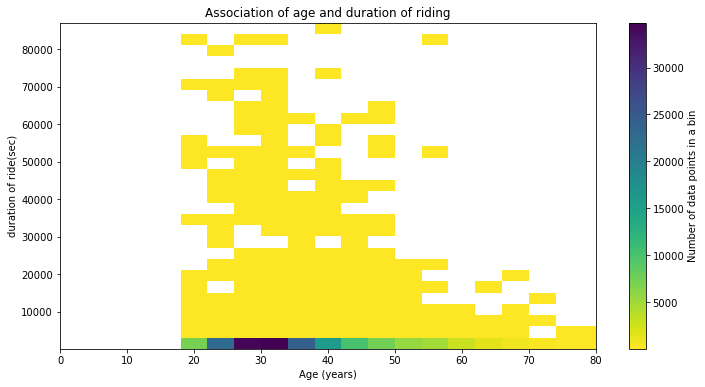

In [22]:
#heat map function
def heat_duration_g(ourdata,x_column,xbin_,ybin_ ):    
    plt.hist2d(data=ourdata, x=str(x_column), y='duration_sec', cmin=0.5, cmap='viridis_r', bins=[xbin_, ybin_])
    plt.xlabel(str(x_column))    
    plt.xlim((0,80))
    
#box plot function
def box_plot_fun(xcol,color2,ylim_lower,ylim_upper):
    sb.boxplot(data=bike_data, y='duration_sec', x=str(xcol), color=color2)
    plt.ylim((int(ylim_lower),int(ylim_upper)))
    
fig=plt.figure(figsize=(12,6))    
xbins_bi=np.arange(18,80+4,4)
ybins_bi=np.arange(61,bike_data['duration_sec'].max()+3000,3000)
heat_duration_g(bike_data,'age',xbins_bi,ybins_bi)
plt.colorbar(label='Number of data points in a bin');
plt.ylabel('duration of ride(sec)')
plt.xlabel('Age (years)')
plt.title('Association of age and duration of riding');

## Association of riding duration, user type and starting stations
On average the male ride for a shorter period than the female and the other gender.

In general, start stations having the highest number of riders do not have highest average riding durations. This implies that on average, the majority of the riders from the commonly used starting stations ride for shorter periods of time. 


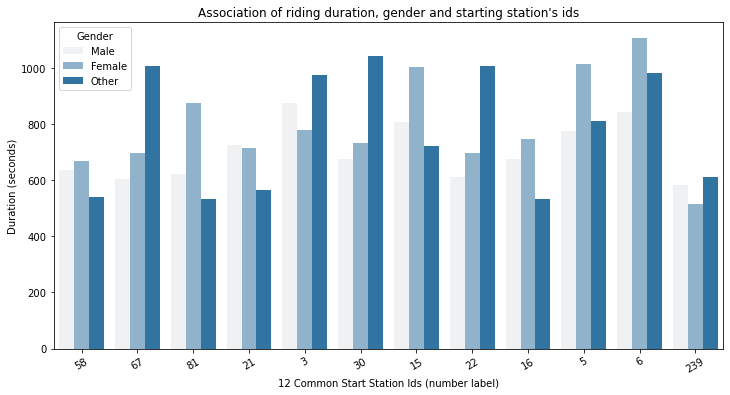

In [23]:
#first 12 start point ids that are common
best12_ids=list(bike_data['start_station_id'].value_counts().index[:12])
bike_data_12pts=bike_data[bike_data['start_station_id'].isin(best12_ids)]

#Use clusted bar plot
cr=sb.color_palette()[0]
fig6=plt.figure(figsize=(12,6))
sb.barplot(data=bike_data_12pts, x='start_station_id', y='duration_sec',hue='member_gender', 
           ci=0, order=best12_ids, color=cr)
plt.xticks(rotation=30)
plt.ylabel('Duration (seconds)')
plt.xlabel('12 Common Start Station Ids (number label)')
plt.title('Association of riding duration, gender and starting station\'s ids') 
plt.legend(title='Gender');

In [26]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt



[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 666084 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Fidelis\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Fidelis\Anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\Fidelis\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Fidelis\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Fidelis\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Us